In [12]:
import numpy as np
import pandas as pd
np.random.seed(42)
apartments=[f"apy_{i}" for i in range (1,21)]
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))}
df=pd.DataFrame(data)
df

,Date,Apartment,Electricity_usage
0,2025-07-01,apy_1,22.483571
1,2025-07-02,apy_1,19.308678
2,2025-07-03,apy_1,23.238443
3,2025-07-04,apy_1,27.615149
4,2025-07-05,apy_1,18.829233
...,...,...,...
595,2025-07-26,apy_20,17.449918
596,2025-07-27,apy_20,18.650625
597,2025-07-28,apy_20,15.106181
598,2025-07-29,apy_20,17.778534


In [13]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [14]:
#Total usage per apartment

In [15]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)

In [16]:
print(usage_per_apartment)

Apartment
apy_11    642.282391
apy_6     641.817993
apy_13    634.225898
apy_10    616.074819
apy_20    613.164300
apy_7     609.838848
apy_8     607.205434
apy_16    606.985293
apy_14    604.314773
apy_3     601.932716
apy_4     596.962256
apy_15    591.394231
apy_19    586.585246
apy_5     585.756283
apy_2     581.825629
apy_9     578.485218
apy_1     571.777966
apy_17    570.315585
apy_12    569.016727
apy_18    549.480581
Name: Electricity_usage, dtype: float64


In [17]:
daily_avg = df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.043539
2025-07-02    20.870132
2025-07-03    19.567646
2025-07-04    20.985517
2025-07-05    19.782940
Name: Electricity_usage, dtype: float64


In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install seaborn


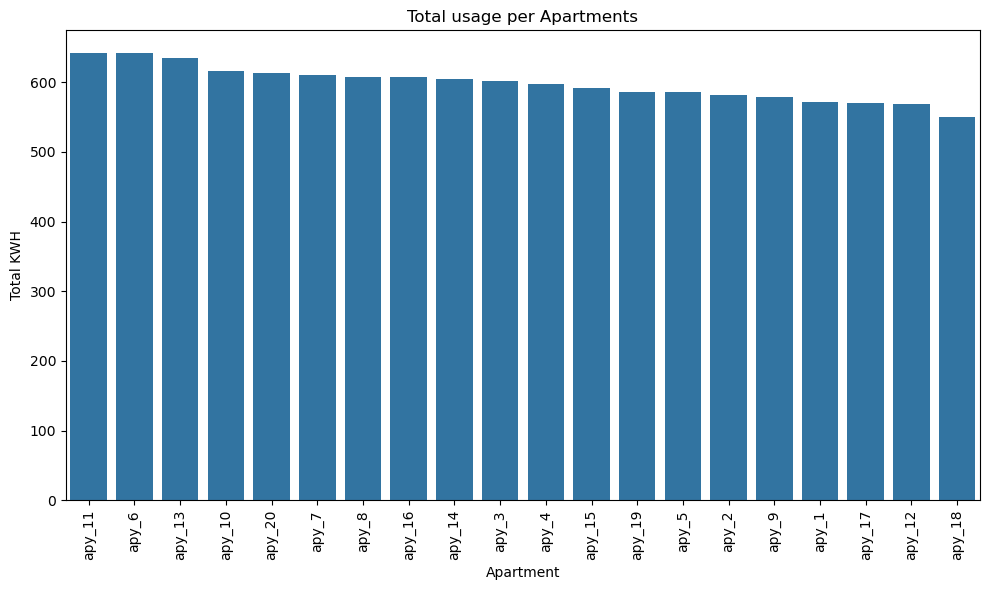

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x = usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

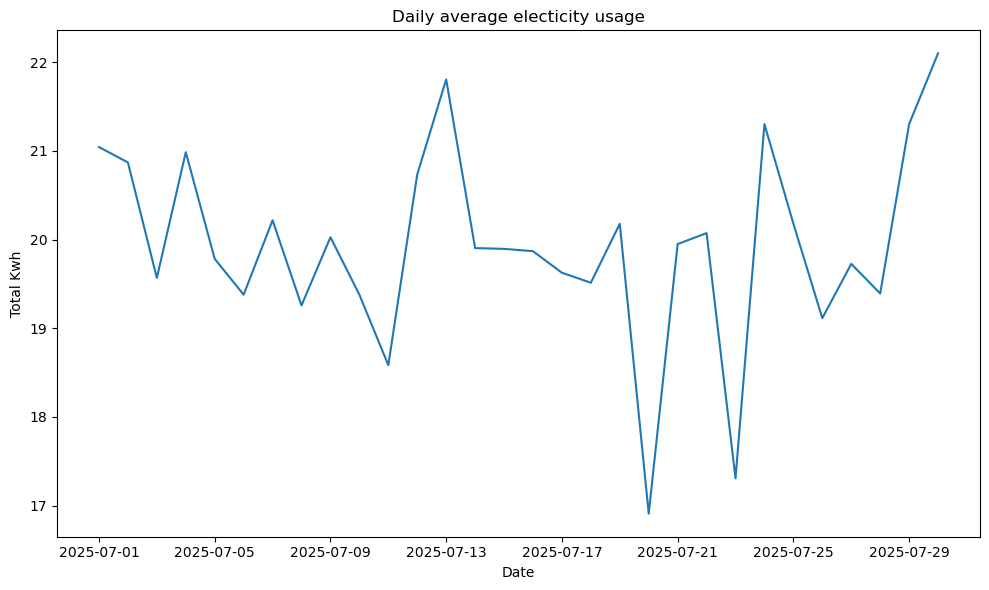

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electicity usage")
plt.xlabel("Date")
plt.ylabel("Total Kwh")
plt.tight_layout()
plt.show()

In [28]:
threshold= df["Electricity_usage"].mean()+2 *df ["Electricity_usage"].std()

df["High_Usage_flag"]=df["Electricity_usage"] > threshold

print(df[df ["High_Usage_flag"] == True].head())

SyntaxError: invalid non-printable character U+00A0 (2124503715.py, line 5)